#### Huge ETFs Stock Markets

#### Exploratory Data Analysis for the ETFs Stock Market

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import folium as fl
import missingno as msno
import autoreload
import json
import csv
import os
import sys
import re

from collections import defaultdict, Counter
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline
%reload_ext autoreload
%autoreload 2

sb.set()
sb.set_style("darkgrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)


#### Load Datasets

                                                        1. Google - Alphabet Stock Exchange Data

In [2]:
alphabet = pd.read_csv("D:\Open Classroom\Datasets\Top Companies Stock Data\Alphabet - Stock Data.csv")
alphabet.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/01/2021,$2381.18,1167901,$2374.44,$2385.71,$2354.28
1,05/28/2021,$2356.85,1074540,$2374.42,$2376.07,$2352.85
2,05/27/2021,$2362.68,1761201,$2389.05,$2389.05,$2356.26
3,05/26/2021,$2380.31,1078598,$2366.52,$2388.99,$2366.4625
4,05/25/2021,$2362.87,1121982,$2372,$2384,$2355


In [3]:
alphabet[["Close/Last", "Volume", "Open", "High", "Low"]] = alphabet[["Close/Last", "Volume", "Open", "High", "Low"]].replace("\$", "", regex = True).astype("float")

In [4]:
alphabet["Date"] = pd.to_datetime(alphabet["Date"])

In [5]:
alphabet["Year"] = alphabet["Date"].dt.year.astype(int)
alphabet["month"] = alphabet["Date"].dt.month.astype(int)
alphabet["day"] = alphabet["Date"].dt.day.astype(int)
alphabet["weekday"] = alphabet["Date"].dt.day_name()

In [6]:
alphabet.head()

,Date,Close/Last,Volume,Open,High,Low,Year,month,day,weekday
0,2021-06-01,2381.18,1167901.0,2374.44,2385.71,2354.2800,2021,6,1,Tuesday
1,2021-05-28,2356.85,1074540.0,2374.42,2376.07,2352.8500,2021,5,28,Friday
2,2021-05-27,2362.68,1761201.0,2389.05,2389.05,2356.2600,2021,5,27,Thursday
3,2021-05-26,2380.31,1078598.0,2366.52,2388.99,2366.4625,2021,5,26,Wednesday
4,2021-05-25,2362.87,1121982.0,2372.00,2384.00,2355.0000,2021,5,25,Tuesday


                                                                2. Apple Stock Exchange Data

In [7]:
aapl = pd.read_csv("D:\Open Classroom\Datasets\Top Companies Stock Data\AAPL - Stock Data.csv")
aapl.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/01/2021,$124.28,67637120,$125.08,$125.35,$123.94
1,05/28/2021,$124.61,71311110,$125.57,$125.8,$124.55
2,05/27/2021,$125.28,94625600,$126.44,$127.64,$125.08
3,05/26/2021,$126.85,56575920,$126.955,$127.39,$126.42
4,05/25/2021,$126.9,72009480,$127.82,$128.32,$126.32


In [8]:
aapl[["Close/Last", "Volume", "Open", "High", "Low"]] = aapl[["Close/Last", "Volume", "Open", "High", "Low"]].replace("\$", "", regex = True).astype("float")

In [9]:
aapl["Date"] = pd.to_datetime(aapl["Date"])

In [10]:
aapl["Year"] = aapl["Date"].dt.year.astype(int)
aapl["month"] = aapl["Date"].dt.month.astype(int)
aapl["day"] = aapl["Date"].dt.day.astype(int)
aapl["weekday"] = aapl["Date"].dt.day_name()

In [11]:
aapl.head()

,Date,Close/Last,Volume,Open,High,Low,Year,month,day,weekday
0,2021-06-01,124.28,67637120.0,125.080,125.35,123.94,2021,6,1,Tuesday
1,2021-05-28,124.61,71311110.0,125.570,125.80,124.55,2021,5,28,Friday
2,2021-05-27,125.28,94625600.0,126.440,127.64,125.08,2021,5,27,Thursday
3,2021-05-26,126.85,56575920.0,126.955,127.39,126.42,2021,5,26,Wednesday
4,2021-05-25,126.90,72009480.0,127.820,128.32,126.32,2021,5,25,Tuesday


                                                                3. Facebook Stock Exchange Data

In [12]:
fb = pd.read_csv("D:\Open Classroom\Datasets\Top Companies Stock Data\FACEBOOK - Stock Data.csv")
fb.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/01/2021,$329.13,11765910,$330.15,$331.42,$326.64
1,05/28/2021,$328.73,12037430,$331,$332.8684,$328.33
2,05/27/2021,$332.75,20477730,$328,$333.78,$326.76
3,05/26/2021,$327.66,9686917,$328.35,$329.8299,$325.82
4,05/25/2021,$327.79,16436970,$327.08,$329.18,$324.8


In [13]:
fb[["Close/Last", "Volume", "Open", "High", "Low"]] = fb[["Close/Last", "Volume", "Open", "High", "Low"]].replace("\$", "", regex = True).astype("float")

In [14]:
fb["Date"] = pd.to_datetime(fb["Date"])

In [15]:
fb["Year"] = fb["Date"].dt.year.astype(int)
fb["month"] = fb["Date"].dt.month.astype(int)
fb["day"] = fb["Date"].dt.day.astype(int)
fb["weekday"] = fb["Date"].dt.day_name()

In [16]:
fb.head()

,Date,Close/Last,Volume,Open,High,Low,Year,month,day,weekday
0,2021-06-01,329.13,11765910.0,330.15,331.4200,326.64,2021,6,1,Tuesday
1,2021-05-28,328.73,12037430.0,331.00,332.8684,328.33,2021,5,28,Friday
2,2021-05-27,332.75,20477730.0,328.00,333.7800,326.76,2021,5,27,Thursday
3,2021-05-26,327.66,9686917.0,328.35,329.8299,325.82,2021,5,26,Wednesday
4,2021-05-25,327.79,16436970.0,327.08,329.1800,324.80,2021,5,25,Tuesday


                                                                    4. Game Stop Stock Exchange Data

In [17]:
gme = pd.read_csv("D:\Open Classroom\Datasets\Top Companies Stock Data\GME - Stock Data.csv")
gme.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/01/2021,$249.02,9625610,$233.48,$254.98,$227.07
1,05/28/2021,$222,11751370,$262.97,$268.7999,$221.43
2,05/27/2021,$254.13,15526300,$229.8,$264,$227
3,05/26/2021,$242.56,21119870,$229,$248.4794,$225.55
4,05/25/2021,$209.43,14887460,$181,$217.11,$181


In [18]:
gme[["Close/Last", "Volume", "Open", "High", "Low"]] = gme[["Close/Last", "Volume", "Open", "High", "Low"]].replace("\$", "", regex = True).astype("float")

In [19]:
gme["Date"] = pd.to_datetime(gme["Date"])

In [20]:
gme["Year"] = gme["Date"].dt.year.astype(int)
gme["month"] = gme["Date"].dt.month.astype(int)
gme["day"] = gme["Date"].dt.day.astype(int)
gme["weekday"] = gme["Date"].dt.day_name()

In [21]:
gme.head()

,Date,Close/Last,Volume,Open,High,Low,Year,month,day,weekday
0,2021-06-01,249.02,9625610.0,233.48,254.9800,227.07,2021,6,1,Tuesday
1,2021-05-28,222.00,11751370.0,262.97,268.7999,221.43,2021,5,28,Friday
2,2021-05-27,254.13,15526300.0,229.80,264.0000,227.00,2021,5,27,Thursday
3,2021-05-26,242.56,21119870.0,229.00,248.4794,225.55,2021,5,26,Wednesday
4,2021-05-25,209.43,14887460.0,181.00,217.1100,181.00,2021,5,25,Tuesday


                                                                    5. TESLA Stock Exchange Data

In [22]:
tsla = pd.read_csv("D:\Open Classroom\Datasets\Top Companies Stock Data\TSLA - Stock Data.csv")
tsla.head()

,Date,Close/Last,Volume,Open,High,Low
0,06/01/2021,$623.9,18084890,$627.8,$633.8,$620.55
1,05/28/2021,$625.22,22737040,$628.5,$635.59,$622.38
2,05/27/2021,$630.85,26370590,$620.24,$631.13,$616.21
3,05/26/2021,$619.13,28639310,$607.56,$626.17,$601.5
4,05/25/2021,$604.69,28005930,$607.31,$613.99,$595.71


In [23]:
tsla[["Close/Last", "Volume", "Open", "High", "Low"]] = tsla[["Close/Last", "Volume", "Open", "High", "Low"]].replace('\$','',regex=True).astype(float)

In [24]:
tsla["Date"] = pd.to_datetime(tsla["Date"])

In [25]:
tsla["Year"] = tsla["Date"].dt.year.astype(int)
tsla["month"] = tsla["Date"].dt.month.astype(int)
tsla["day"] = tsla["Date"].dt.day.astype(int)
tsla["weekday"] = tsla["Date"].dt.day_name()

In [26]:
tsla.head()

,Date,Close/Last,Volume,Open,High,Low,Year,month,day,weekday
0,2021-06-01,623.90,18084890.0,627.80,633.80,620.55,2021,6,1,Tuesday
1,2021-05-28,625.22,22737040.0,628.50,635.59,622.38,2021,5,28,Friday
2,2021-05-27,630.85,26370590.0,620.24,631.13,616.21,2021,5,27,Thursday
3,2021-05-26,619.13,28639310.0,607.56,626.17,601.50,2021,5,26,Wednesday
4,2021-05-25,604.69,28005930.0,607.31,613.99,595.71,2021,5,25,Tuesday


#### Data Presentation

Text(0.5, 1.0, 'Trade History Report for the most popular \nStock Exchange Companies')

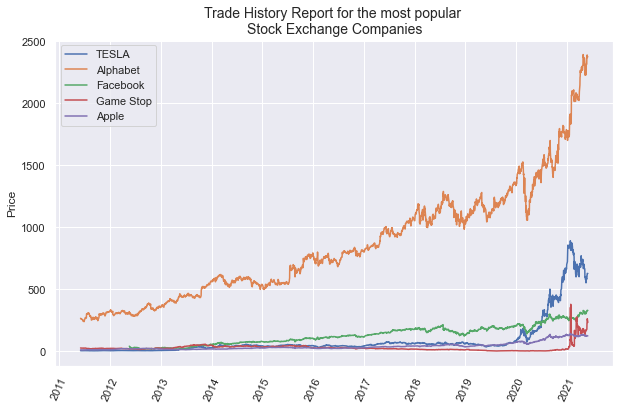

In [27]:
plt.figure(figsize = (10, 6))

bar = sb.lineplot(x = tsla["Date"], y = tsla["Open"], label = "TESLA")
bar = sb.lineplot(x = alphabet["Date"], y = alphabet["Open"], label = "Alphabet")
bar = sb.lineplot(x = fb["Date"], y = fb["Open"], label = "Facebook")
bar = sb.lineplot(x = gme["Date"], y = gme["Open"], label = "Game Stop")
bar = sb.lineplot(x = aapl["Date"], y = aapl["Open"], label = "Apple")

plt.xticks(rotation = 65)
plt.xlabel(None)
plt.ylabel("Price")
plt.title("Trade History Report for the most popular \nStock Exchange Companies", fontdict={"fontsize": 14})


In [31]:
def get_data(year, price, x):
    svc_linear = SVC(kernel = "linear")
    svc_poly = SVC(kernel = "poly")
    svc_rbf = SVC(kernel = "rbf")
    
    svc_linear.fit(year, price)
    svc_poly.fit(year, price)
    svc_rbf.fit(year, price)
    
    sb.scatterplot(year, price, color = "black")
    sb.lineplot(year, svc_linear.predict(date))
    sb.lineplot(year, svc_poly.predict(date))
    sb.lineplot(year, svc_rbf.predict())
    
    return svc_linear.predict(x), svc_poly.predict(x), svc_rbf.predict(x)
    

In [32]:
get_data(alphabet['Year'], alphabet['Open'], alphabet['Open'])

ValueError: Expected 2D array, got 1D array instead:
array=[1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.